## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0193650	total: 57.7ms	remaining: 57.7s
1:	learn: 0.9985112	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9771618	total: 59.7ms	remaining: 19.9s
3:	learn: 0.9612276	total: 60.7ms	remaining: 15.1s
4:	learn: 0.9447693	total: 61.6ms	remaining: 12.3s
5:	learn: 0.9267180	total: 62.6ms	remaining: 10.4s
6:	learn: 0.9082231	total: 63.6ms	remaining: 9.03s
7:	learn: 0.8912778	total: 64.5ms	remaining: 8s
8:	learn: 0.8747675	total: 65.5ms	remaining: 7.21s
9:	learn: 0.8573037	total: 66.5ms	remaining: 6.58s
10:	learn: 0.8411587	total: 67.3ms	remaining: 6.05s
11:	learn: 0.8250829	total: 68.2ms	remaining: 5.61s
12:	learn: 0.8086855	total: 69ms	remaining: 5.24s
13:	learn: 0.7926592	total: 69.9ms	remaining: 4.92s
14:	learn: 0.7791055	total: 70.7ms	remaining: 4.64s
15:	learn: 0.7634128	total: 71.5ms	remaining: 4.4s
16:	learn: 0.7506544	total: 72.3ms	remaining: 4.18s
17:	learn: 0.7376600	total: 73.1ms	remaining: 3.99s
18:	learn: 0.7249178	total: 74.2ms	remaining: 3.83

61:	learn: 0.4173775	total: 108ms	remaining: 1.64s
62:	learn: 0.4130760	total: 109ms	remaining: 1.63s
63:	learn: 0.4096734	total: 110ms	remaining: 1.61s
64:	learn: 0.4052167	total: 111ms	remaining: 1.59s
65:	learn: 0.4016682	total: 112ms	remaining: 1.58s
66:	learn: 0.3987199	total: 113ms	remaining: 1.57s
67:	learn: 0.3945904	total: 113ms	remaining: 1.55s
68:	learn: 0.3909500	total: 114ms	remaining: 1.54s
69:	learn: 0.3870439	total: 115ms	remaining: 1.53s
70:	learn: 0.3833315	total: 116ms	remaining: 1.51s
71:	learn: 0.3789276	total: 117ms	remaining: 1.5s
72:	learn: 0.3746976	total: 118ms	remaining: 1.49s
73:	learn: 0.3716429	total: 118ms	remaining: 1.48s
74:	learn: 0.3689736	total: 119ms	remaining: 1.47s
75:	learn: 0.3654589	total: 120ms	remaining: 1.46s
76:	learn: 0.3626756	total: 122ms	remaining: 1.46s
77:	learn: 0.3603229	total: 122ms	remaining: 1.45s
78:	learn: 0.3577977	total: 123ms	remaining: 1.44s
79:	learn: 0.3553262	total: 124ms	remaining: 1.43s
80:	learn: 0.3531608	total: 125m

162:	learn: 0.2514994	total: 192ms	remaining: 985ms
163:	learn: 0.2506030	total: 193ms	remaining: 983ms
164:	learn: 0.2498088	total: 194ms	remaining: 980ms
165:	learn: 0.2494623	total: 194ms	remaining: 977ms
166:	learn: 0.2489322	total: 195ms	remaining: 973ms
167:	learn: 0.2485248	total: 196ms	remaining: 971ms
168:	learn: 0.2482177	total: 197ms	remaining: 968ms
169:	learn: 0.2477346	total: 198ms	remaining: 965ms
170:	learn: 0.2472920	total: 199ms	remaining: 963ms
171:	learn: 0.2467404	total: 199ms	remaining: 960ms
172:	learn: 0.2459825	total: 200ms	remaining: 957ms
173:	learn: 0.2452816	total: 201ms	remaining: 955ms
174:	learn: 0.2448512	total: 202ms	remaining: 952ms
175:	learn: 0.2446455	total: 203ms	remaining: 949ms
176:	learn: 0.2442098	total: 204ms	remaining: 947ms
177:	learn: 0.2438113	total: 204ms	remaining: 944ms
178:	learn: 0.2434465	total: 205ms	remaining: 941ms
179:	learn: 0.2430103	total: 206ms	remaining: 938ms
180:	learn: 0.2421690	total: 207ms	remaining: 935ms
181:	learn: 

292:	learn: 0.1952148	total: 299ms	remaining: 721ms
293:	learn: 0.1949021	total: 300ms	remaining: 720ms
294:	learn: 0.1944669	total: 301ms	remaining: 719ms
295:	learn: 0.1940889	total: 302ms	remaining: 717ms
296:	learn: 0.1937349	total: 303ms	remaining: 716ms
297:	learn: 0.1932732	total: 304ms	remaining: 715ms
298:	learn: 0.1929379	total: 304ms	remaining: 714ms
299:	learn: 0.1925780	total: 305ms	remaining: 712ms
300:	learn: 0.1922175	total: 306ms	remaining: 711ms
301:	learn: 0.1916635	total: 307ms	remaining: 709ms
302:	learn: 0.1913724	total: 308ms	remaining: 708ms
303:	learn: 0.1910065	total: 309ms	remaining: 706ms
304:	learn: 0.1906849	total: 309ms	remaining: 705ms
305:	learn: 0.1903910	total: 310ms	remaining: 704ms
306:	learn: 0.1899455	total: 311ms	remaining: 702ms
307:	learn: 0.1894116	total: 312ms	remaining: 700ms
308:	learn: 0.1889811	total: 313ms	remaining: 699ms
309:	learn: 0.1886556	total: 313ms	remaining: 697ms
310:	learn: 0.1881464	total: 314ms	remaining: 696ms
311:	learn: 

390:	learn: 0.1609509	total: 383ms	remaining: 596ms
391:	learn: 0.1607504	total: 383ms	remaining: 595ms
392:	learn: 0.1603844	total: 384ms	remaining: 594ms
393:	learn: 0.1601921	total: 385ms	remaining: 593ms
394:	learn: 0.1598167	total: 386ms	remaining: 592ms
395:	learn: 0.1594836	total: 387ms	remaining: 590ms
396:	learn: 0.1592367	total: 388ms	remaining: 589ms
397:	learn: 0.1589178	total: 389ms	remaining: 588ms
398:	learn: 0.1585768	total: 389ms	remaining: 587ms
399:	learn: 0.1581150	total: 390ms	remaining: 585ms
400:	learn: 0.1578779	total: 391ms	remaining: 584ms
401:	learn: 0.1574645	total: 392ms	remaining: 583ms
402:	learn: 0.1571608	total: 393ms	remaining: 582ms
403:	learn: 0.1569448	total: 394ms	remaining: 581ms
404:	learn: 0.1566364	total: 394ms	remaining: 579ms
405:	learn: 0.1563179	total: 395ms	remaining: 578ms
406:	learn: 0.1560602	total: 396ms	remaining: 577ms
407:	learn: 0.1557649	total: 397ms	remaining: 576ms
408:	learn: 0.1554574	total: 398ms	remaining: 575ms
409:	learn: 

516:	learn: 0.1286900	total: 490ms	remaining: 458ms
517:	learn: 0.1285195	total: 491ms	remaining: 457ms
518:	learn: 0.1282404	total: 492ms	remaining: 456ms
519:	learn: 0.1280813	total: 492ms	remaining: 454ms
520:	learn: 0.1277734	total: 493ms	remaining: 453ms
521:	learn: 0.1275361	total: 494ms	remaining: 452ms
522:	learn: 0.1275068	total: 495ms	remaining: 451ms
523:	learn: 0.1274722	total: 495ms	remaining: 450ms
524:	learn: 0.1271836	total: 496ms	remaining: 449ms
525:	learn: 0.1268983	total: 497ms	remaining: 448ms
526:	learn: 0.1268579	total: 498ms	remaining: 447ms
527:	learn: 0.1265295	total: 499ms	remaining: 446ms
528:	learn: 0.1262417	total: 499ms	remaining: 445ms
529:	learn: 0.1260010	total: 500ms	remaining: 444ms
530:	learn: 0.1257922	total: 501ms	remaining: 443ms
531:	learn: 0.1257564	total: 502ms	remaining: 441ms
532:	learn: 0.1256024	total: 503ms	remaining: 441ms
533:	learn: 0.1253010	total: 504ms	remaining: 440ms
534:	learn: 0.1251273	total: 505ms	remaining: 439ms
535:	learn: 

615:	learn: 0.1092860	total: 573ms	remaining: 357ms
616:	learn: 0.1092684	total: 574ms	remaining: 356ms
617:	learn: 0.1091367	total: 575ms	remaining: 355ms
618:	learn: 0.1089206	total: 575ms	remaining: 354ms
619:	learn: 0.1086877	total: 576ms	remaining: 353ms
620:	learn: 0.1085591	total: 577ms	remaining: 352ms
621:	learn: 0.1083951	total: 578ms	remaining: 351ms
622:	learn: 0.1081438	total: 579ms	remaining: 350ms
623:	learn: 0.1079300	total: 579ms	remaining: 349ms
624:	learn: 0.1077945	total: 580ms	remaining: 348ms
625:	learn: 0.1075828	total: 581ms	remaining: 347ms
626:	learn: 0.1073752	total: 582ms	remaining: 346ms
627:	learn: 0.1073186	total: 583ms	remaining: 345ms
628:	learn: 0.1072494	total: 583ms	remaining: 344ms
629:	learn: 0.1071571	total: 584ms	remaining: 343ms
630:	learn: 0.1071405	total: 585ms	remaining: 342ms
631:	learn: 0.1069632	total: 586ms	remaining: 341ms
632:	learn: 0.1067627	total: 587ms	remaining: 340ms
633:	learn: 0.1066809	total: 588ms	remaining: 339ms
634:	learn: 

742:	learn: 0.0896323	total: 680ms	remaining: 235ms
743:	learn: 0.0895241	total: 681ms	remaining: 234ms
744:	learn: 0.0894479	total: 682ms	remaining: 233ms
745:	learn: 0.0894223	total: 683ms	remaining: 232ms
746:	learn: 0.0893088	total: 683ms	remaining: 231ms
747:	learn: 0.0891112	total: 684ms	remaining: 231ms
748:	learn: 0.0890282	total: 685ms	remaining: 230ms
749:	learn: 0.0889531	total: 686ms	remaining: 229ms
750:	learn: 0.0888174	total: 687ms	remaining: 228ms
751:	learn: 0.0887184	total: 688ms	remaining: 227ms
752:	learn: 0.0886310	total: 689ms	remaining: 226ms
753:	learn: 0.0885237	total: 690ms	remaining: 225ms
754:	learn: 0.0883144	total: 691ms	remaining: 224ms
755:	learn: 0.0881802	total: 692ms	remaining: 223ms
756:	learn: 0.0880550	total: 693ms	remaining: 222ms
757:	learn: 0.0879361	total: 694ms	remaining: 221ms
758:	learn: 0.0878446	total: 694ms	remaining: 220ms
759:	learn: 0.0877454	total: 695ms	remaining: 220ms
760:	learn: 0.0875291	total: 696ms	remaining: 219ms
761:	learn: 

841:	learn: 0.0785982	total: 764ms	remaining: 143ms
842:	learn: 0.0785652	total: 765ms	remaining: 142ms
843:	learn: 0.0783974	total: 765ms	remaining: 141ms
844:	learn: 0.0783367	total: 766ms	remaining: 141ms
845:	learn: 0.0782026	total: 767ms	remaining: 140ms
846:	learn: 0.0780478	total: 768ms	remaining: 139ms
847:	learn: 0.0778886	total: 769ms	remaining: 138ms
848:	learn: 0.0777738	total: 770ms	remaining: 137ms
849:	learn: 0.0776758	total: 770ms	remaining: 136ms
850:	learn: 0.0775365	total: 771ms	remaining: 135ms
851:	learn: 0.0774743	total: 772ms	remaining: 134ms
852:	learn: 0.0773383	total: 773ms	remaining: 133ms
853:	learn: 0.0771814	total: 774ms	remaining: 132ms
854:	learn: 0.0770682	total: 775ms	remaining: 131ms
855:	learn: 0.0769242	total: 775ms	remaining: 130ms
856:	learn: 0.0768647	total: 776ms	remaining: 130ms
857:	learn: 0.0767941	total: 777ms	remaining: 129ms
858:	learn: 0.0767593	total: 778ms	remaining: 128ms
859:	learn: 0.0766953	total: 779ms	remaining: 127ms
860:	learn: 

970:	learn: 0.0661348	total: 870ms	remaining: 26ms
971:	learn: 0.0660880	total: 871ms	remaining: 25.1ms
972:	learn: 0.0660643	total: 872ms	remaining: 24.2ms
973:	learn: 0.0660199	total: 873ms	remaining: 23.3ms
974:	learn: 0.0659681	total: 874ms	remaining: 22.4ms
975:	learn: 0.0658953	total: 875ms	remaining: 21.5ms
976:	learn: 0.0658470	total: 876ms	remaining: 20.6ms
977:	learn: 0.0657197	total: 877ms	remaining: 19.7ms
978:	learn: 0.0656489	total: 877ms	remaining: 18.8ms
979:	learn: 0.0655438	total: 878ms	remaining: 17.9ms
980:	learn: 0.0654679	total: 879ms	remaining: 17ms
981:	learn: 0.0653824	total: 880ms	remaining: 16.1ms
982:	learn: 0.0652789	total: 881ms	remaining: 15.2ms
983:	learn: 0.0651933	total: 882ms	remaining: 14.3ms
984:	learn: 0.0650900	total: 883ms	remaining: 13.4ms
985:	learn: 0.0650141	total: 883ms	remaining: 12.5ms
986:	learn: 0.0648913	total: 884ms	remaining: 11.6ms
987:	learn: 0.0648562	total: 885ms	remaining: 10.8ms
988:	learn: 0.0647266	total: 886ms	remaining: 9.85

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

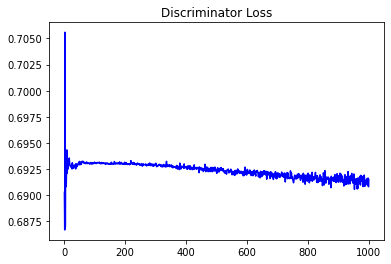

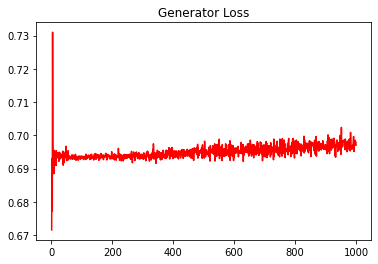

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.068930755095618


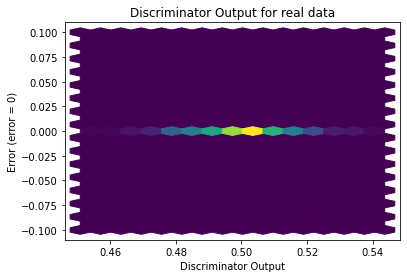

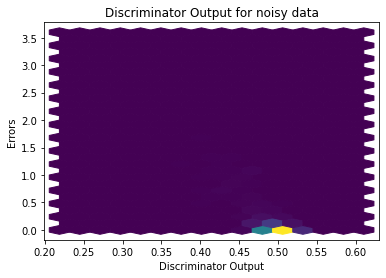

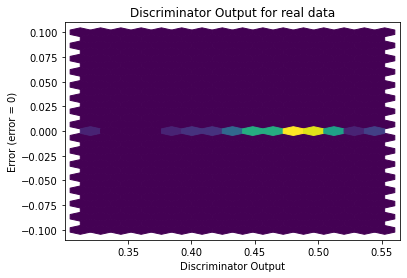

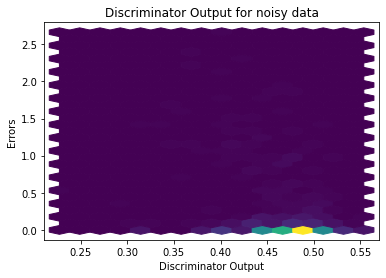

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


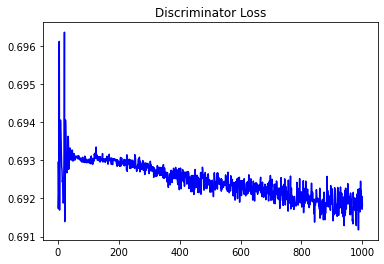

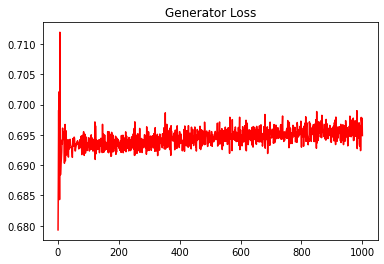

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08987068470930287


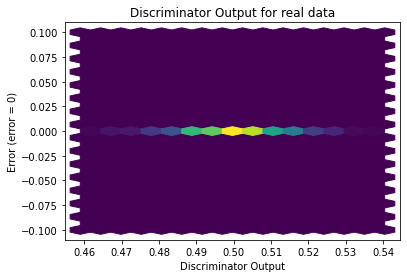

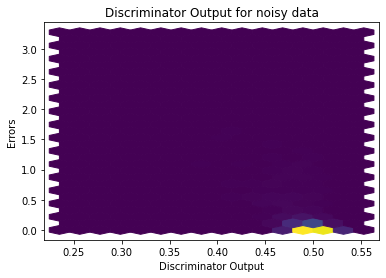

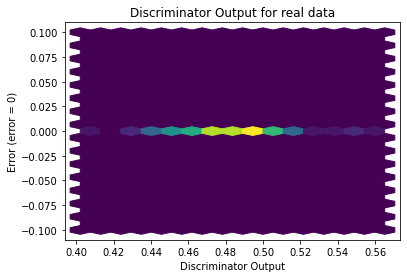

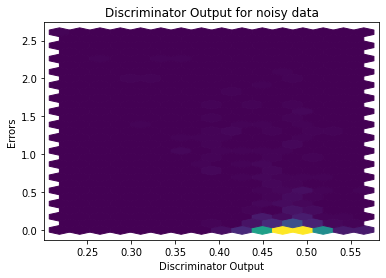

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2537]], requires_grad=True)
